# Project Name: Customer Segmentation

### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.cluster import KMeans

import opendatasets as od
import os

import warnings
warnings.filterwarnings('ignore')

### Importing the datasets

Link: (https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python)

In [2]:
od.download("https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python")

Skipping, found downloaded files in ".\customer-segmentation-tutorial-in-python" (use force=True to force download)


In [3]:
os.listdir('customer-segmentation-tutorial-in-python')

['Mall_Customers.csv']

In [4]:
df = pd.read_csv('./customer-segmentation-tutorial-in-python/Mall_Customers.csv')

### Daya Analysis

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [7]:
df.shape



(200, 5)

> ### If we have low amount of datapoints, how can we enlarge the present datapoint to train our model.
> 

- If you have a low amount of data points, it can be challenging to train a model that is accurate and generalizes well. However, you can use some techniques to increase your available data. Here are a few methods you can consider: 
  - Data Augmentation: You can use data augmentation techniques to generate new samples from your existing dataset. This can include techniques such as rotation, flipping, scaling, cropping, and more. By using these techniques, you can create additional samples that are similar to your original data, but still provide some variety for your model to learn from.
  - Transfer Learning: Transfer learning involves using a pre-trained model on a similar task to your own, and then fine-tuning it on your dataset. This can be a powerful technique for small datasets, as it allows you to leverage the knowledge learned from the pre-trained model to improve your own.
  - Synthetic Data: If you are unable to generate new samples from your existing dataset, you can also consider creating synthetic data. This involves generating data points that are similar to your existing data, but are not actually part of your original dataset. This can be done through various methods such as generative models or simulation.
  - Semi-Supervised Learning: In semi-supervised learning, you use a combination of labeled and unlabeled data to train your model. This can be useful if you have a small amount of labeled data, but a larger amount of unlabeled data available. By leveraging the unlabeled data, you can improve the performance of your model.

- Keep in mind that these techniques are not a substitute for having a large, diverse dataset. However, they can help you to maximize the information you have available and improve the performance of your models.


In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Conclusion
1. No null Values
2. Gender has the dtype object, which needs to be taken care of.

In [10]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Conclusion:
1. Avg. Age od customer is 38
2. CUstomers that visits the mall is having the age b/w 18 to 70.
3. Having the Avg. Annual income as $60k

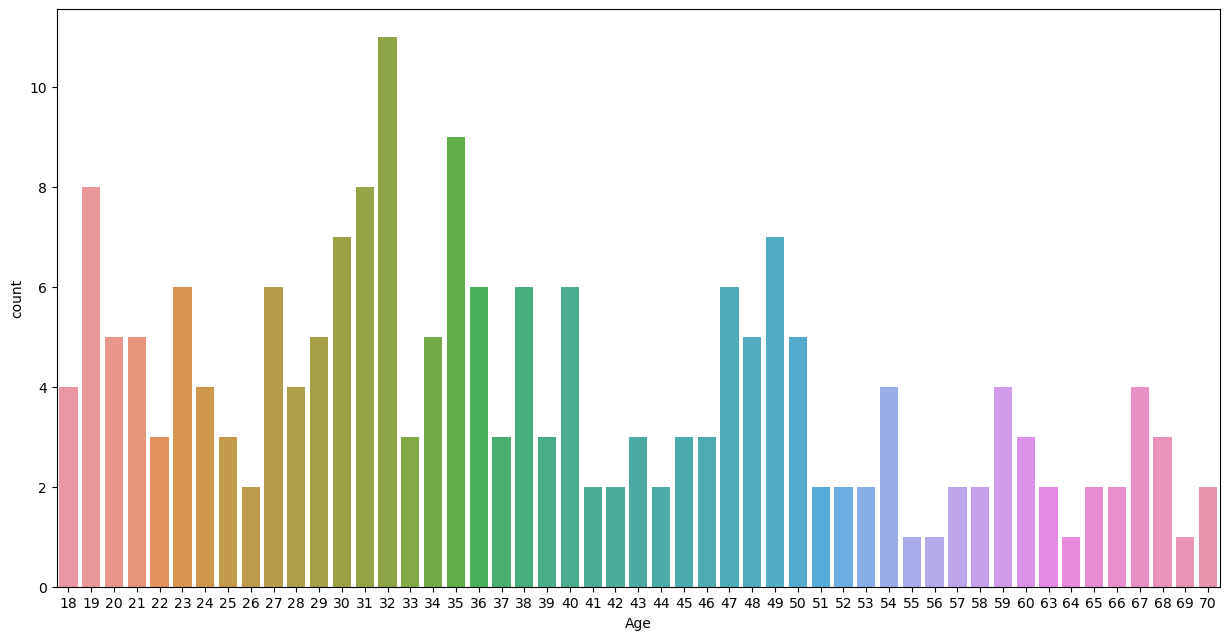

In [11]:
plt.figure(figsize=(15,7.5));
sns.countplot(data = df, x = 'Age');

In [12]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


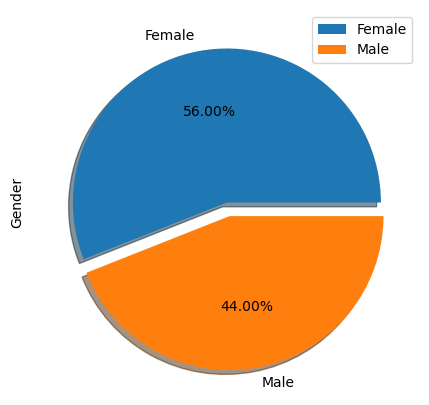

In [13]:
# How many % of Male and Female visits the mall with the help of plot.

plt.figure (figsize=(5,5));
df.Gender.value_counts().plot(kind='pie', autopct = '%.2f%%', shadow = True, explode=(0,0.09));
plt.legend();

### Conclusion
1. No. of Females > No. of Males
2. Females are visiting the mall 12% more than male.
3. Female visit the mall most of the time.

In [14]:
df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


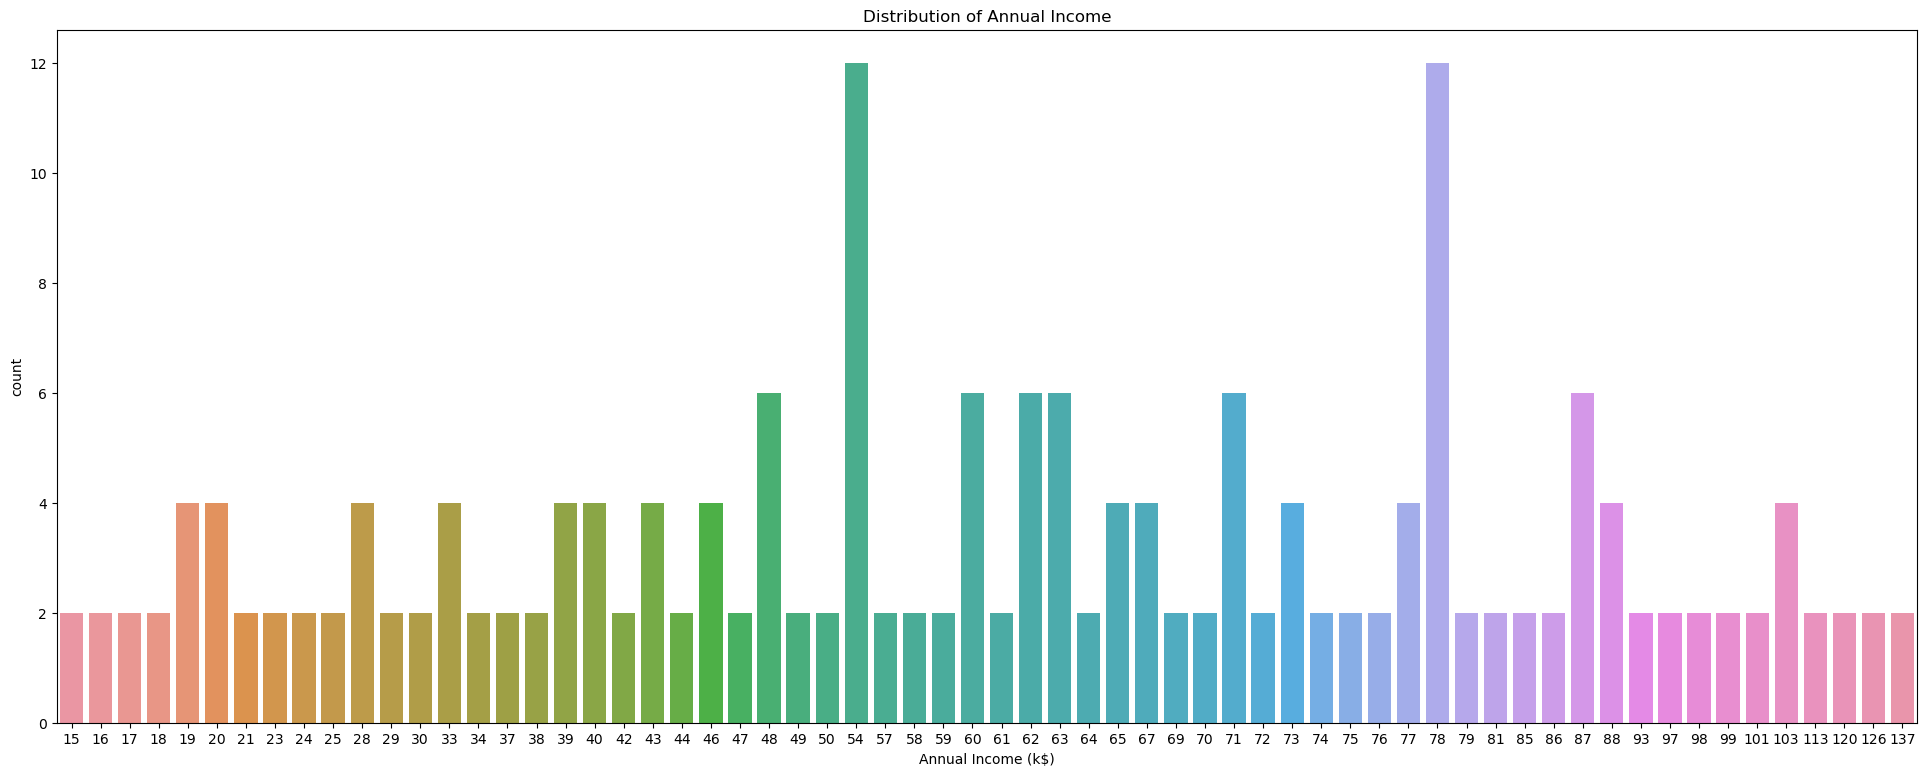

In [15]:
# Distribution of income

plt.figure(figsize=(24,9));
sns.countplot(x = df['Annual Income (k$)'],data = df);
plt.title("Distribution of Annual Income");

### Conclusion
1. The customers those are having the annual income of 54k and 78k, visit the mall most of the time.

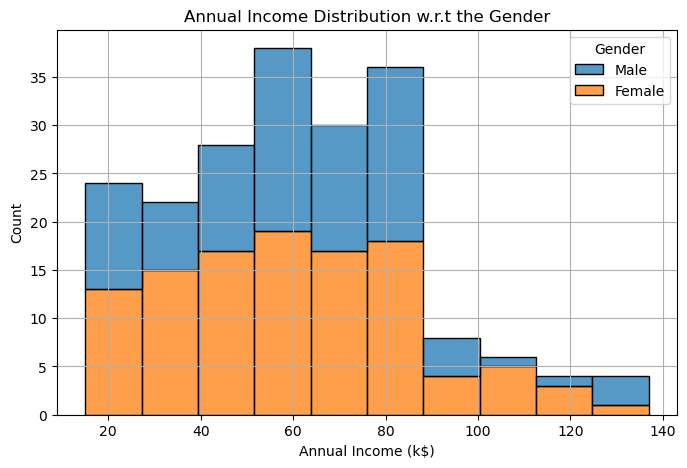

In [16]:
# Show the Annual Income Distribution w.r.t the Gender.

plt.figure(figsize=(8,5));
sns.histplot(df, x = 'Annual Income (k$)', hue = 'Gender', multiple='stack');
plt.title('Annual Income Distribution w.r.t the Gender');
plt.grid()

### Seaborn lmplot

In [17]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


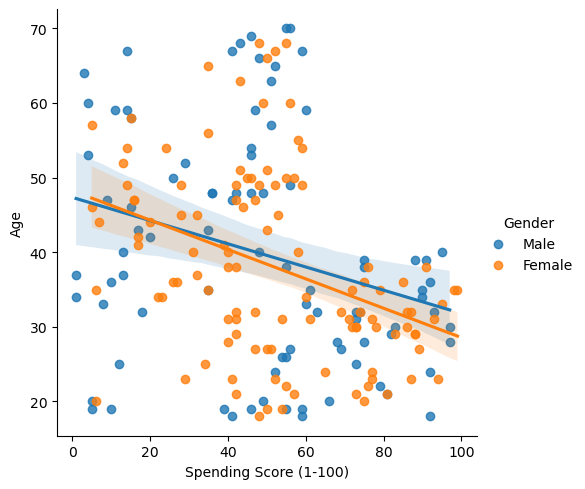

In [18]:
sns.lmplot(data = df,x = 'Spending Score (1-100)', y = 'Age', hue = 'Gender');

### Machine Learning

In [19]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Label Encoding

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
enc = LabelEncoder()

In [22]:
df.Gender = enc.fit_transform(df.Gender)

In [23]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [24]:
df.drop('CustomerID',axis=1, inplace = True)

In [26]:
ssd = []
for i in range(1,11):
    Kmodel = KMeans(n_clusters=i, n_init= 15, max_iter=500,)
    Kmodel.fit(df)
    ssd.append(Kmodel.inertia_)

In [27]:
ssd

[308862.06,
 212889.44245524297,
 143391.5923603568,
 104414.67534220166,
 75399.61541401484,
 58348.64136331505,
 51132.70321257689,
 44357.6215098352,
 40887.36331763754,
 37747.05061333003]

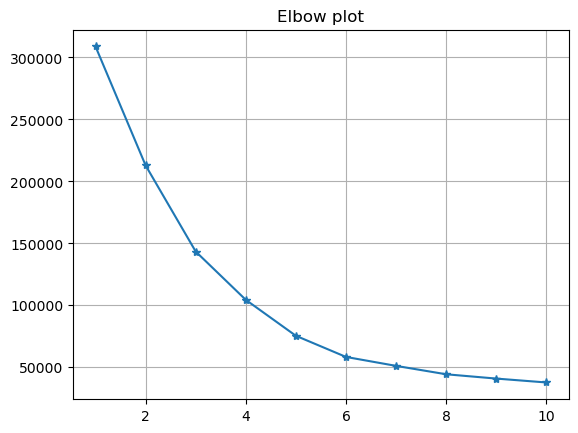

In [34]:
plt.plot(range(1,11), ssd, marker = '*');
plt.grid()
plt.title("Elbow plot");

In [46]:
# k = 6
Kmodel = KMeans(n_clusters=6)
Kmodel

KMeans(n_clusters=6)

In [49]:
# Kmodel.fit_predict(df)

predict = Kmodel.predict(df)
predict
# This code is same as above

array([3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5,
       3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 0, 5, 0, 1,
       3, 5, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 4, 1, 4, 2, 4, 2, 4, 2, 4,
       1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4])

In [48]:
Kmodel.cluster_centers_

array([[ 0.44444444, 56.15555556, 53.37777778, 49.08888889],
       [ 0.34210526, 27.        , 56.65789474, 49.13157895],
       [ 0.57142857, 41.68571429, 88.22857143, 17.28571429],
       [ 0.38095238, 44.14285714, 25.14285714, 19.52380952],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.40909091, 25.27272727, 25.72727273, 79.36363636]])

In [50]:
df['Cluster'] = predict
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,3
1,1,21,15,81,5
2,0,20,16,6,3
3,0,23,16,77,5
4,0,31,17,40,3


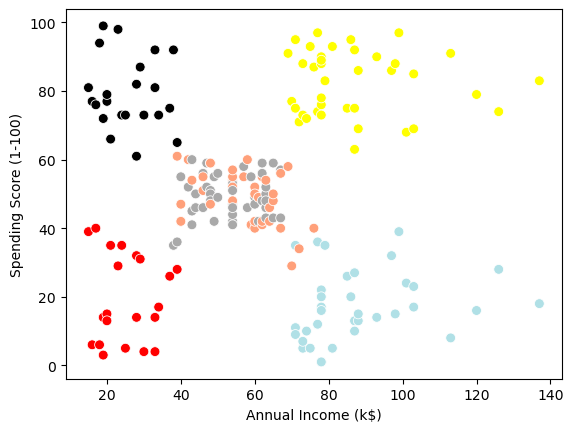

In [71]:
color = np.array(['darkgray', 'lightsalmon', 'powderblue', 'red', 'yellow', 'black'])
sns.scatterplot(x = df['Annual Income (k$)'],
                y = df['Spending Score (1-100)'],
                c=color[Kmodel.labels_],
                s=50);

In [63]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [64]:
lin = linkage(df,method='ward')

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [40.0, 40.0, 60.0, 60.0],
  [12.5, 12.5, 50.0, 50.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [105.0, 105.0, 115.0, 115.0],
  [82.5, 82.5, 110.0, 110.0],
  [135.0, 135.0, 145.0, 145.0],
  [155.0, 155.0, 165.0, 165.0],
  [140.0, 140.0, 160.0, 160.0],
  [125.0, 125.0, 150.0, 150.0],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [175.0, 175.0, 192.5, 192.5],
  [137.5, 137.5, 183.75, 183.75],
  [96.25, 96.25, 160.625, 160.625],
  [31.25, 31.25, 128.4375, 128.4375],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [245.0, 245.0, 255.0, 255.0],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [250.0, 250.0, 272.5, 272.5],
  [222.5, 222.5, 261.25, 261.25],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [325.0, 325.0, 335.0, 335.0],
  [355.0, 355.0, 365.0, 365.0],
  [345.0, 345.0, 360

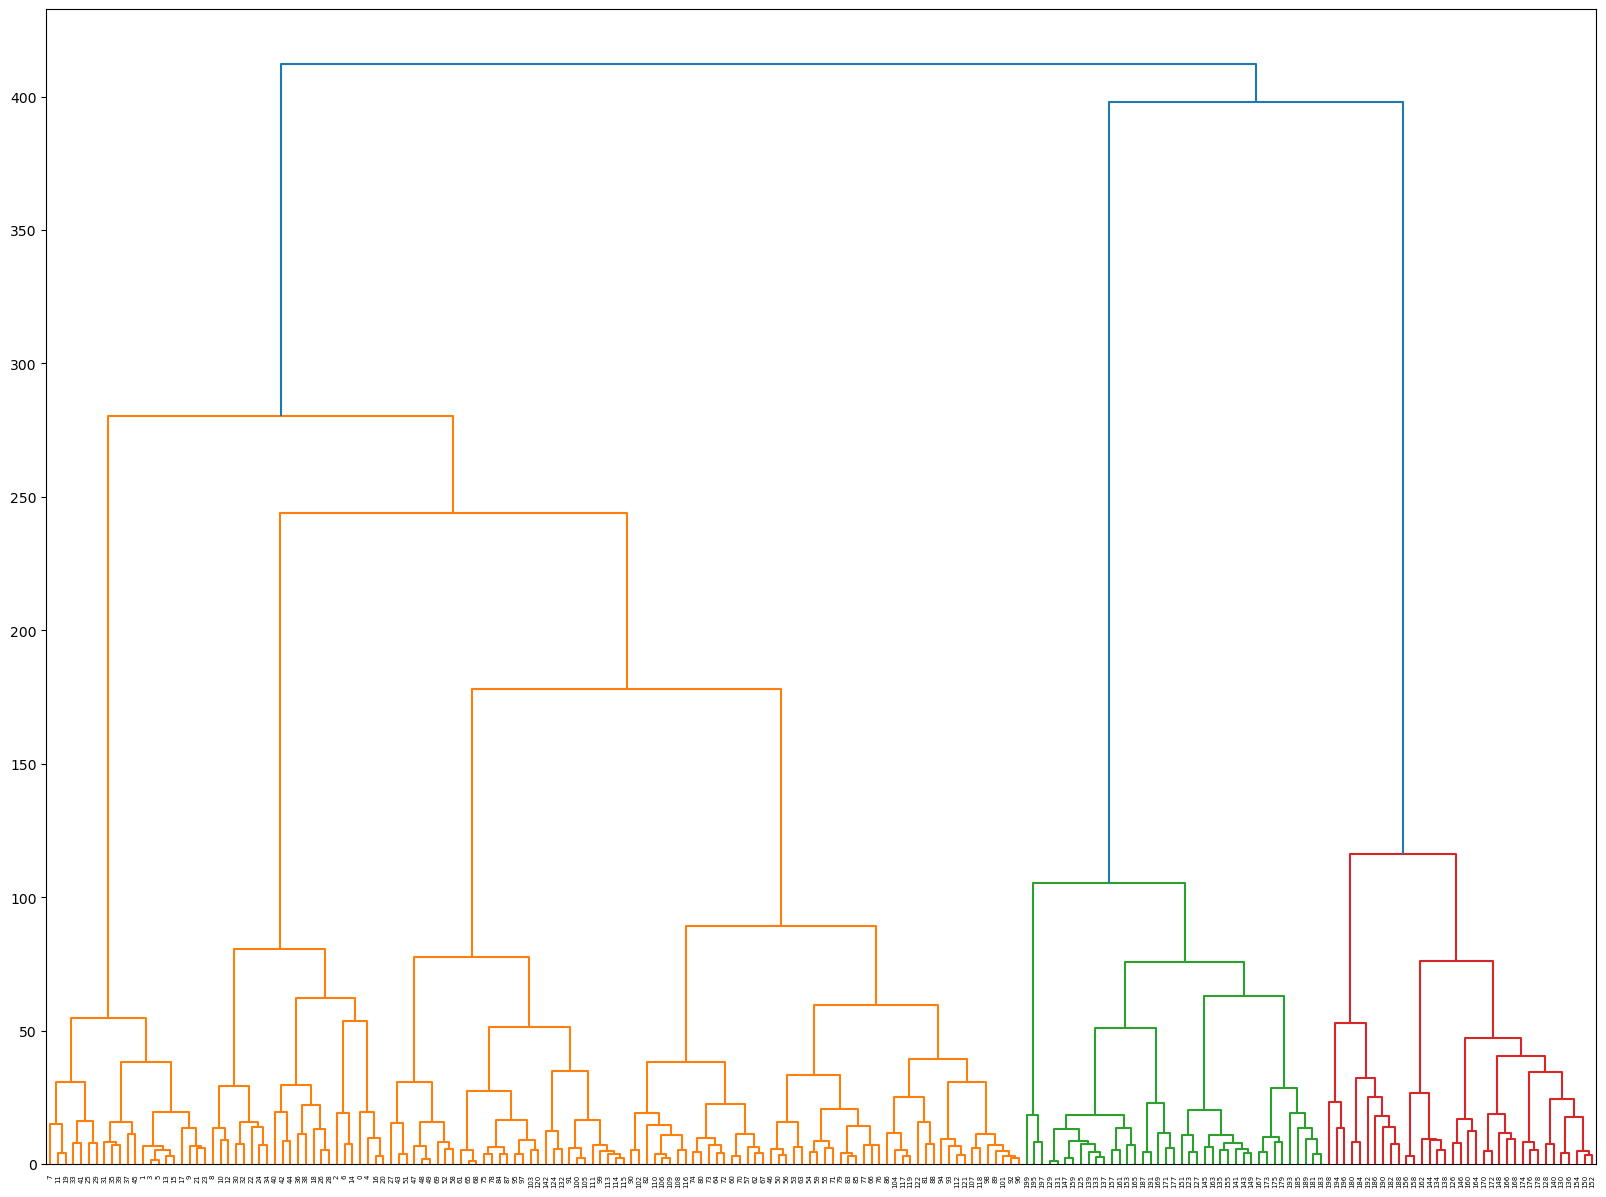

In [68]:
plt.figure(figsize=(20,15))
dendrogram(lin, leaf_rotation=90)

In [69]:
# DBSCAN